# Hoja de Trabajo \# 5


---


por Josué Obregón <br>
DS6011 - Feature Engineering <br>
UVG Masters - Escuela de Negocios<br>


## Objetivos

El objetivo de esta hoja de trabajo  es presentar al estudiante diferentes técnicas de extracción y generación de atributos.

También se busca que el estudiante practique la utilización de éstas técnicas con las librerías disponibles en el lenguaje Python.

## Importación de librerías y carga de los datos

Las librerías que importaremos para empezar son pandas y numpy para el manejo de los datos, y matplotlib, seaborn y plotly para la generación de visualizaciones. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Dimensionality reduction

## Ejemplo con datos de prueba

In [2]:
df_test = pd.DataFrame({
... 'Gene1': [10,11,8,3,2,1],
... 'Gene2': [6,4,5,3,2.8,1],
... 'Gene3': [12,9,10,2.5,1.3,2],
... 'Gene4': [5,7,6,2,4,7]
... }, index=['Mouse1','Mouse2','Mouse3','Mouse4','Mouse5','Mouse6'])

In [3]:
df_test

,Gene1,Gene2,Gene3,Gene4
Mouse1,10,6.0,12.0,5
Mouse2,11,4.0,9.0,7
Mouse3,8,5.0,10.0,6
Mouse4,3,3.0,2.5,2
Mouse5,2,2.8,1.3,4
Mouse6,1,1.0,2.0,7


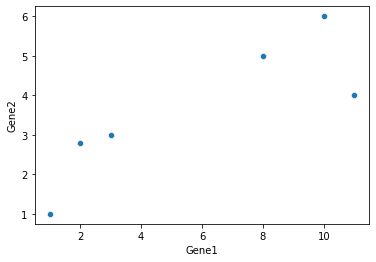

In [4]:
sns.scatterplot(data=df_test,  x='Gene1',y='Gene2')

### PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)

In [7]:
pca.fit(df_test)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca_proj = pd.DataFrame(pca.transform(df_test), columns=['Component1','Component2'], index = df_test.index)

In [9]:
pca_proj

,Component1,Component2
Mouse1,7.435167,-1.157951
Mouse2,5.696298,1.510140
Mouse3,4.582350,0.182406
Mouse4,-4.935668,-2.625896
Mouse5,-6.264743,-0.673880
Mouse6,-6.513403,2.765180


In [10]:
pca.explained_variance_ratio_

array([0.89284793, 0.07753734])

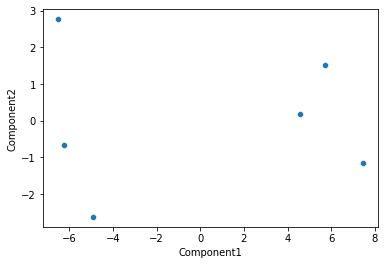

In [11]:
sns.scatterplot(data=pca_proj,  x='Component1',y='Component2')

### NMF

In [12]:
from sklearn.decomposition import NMF

In [13]:
nmf = NMF(n_components=2)

In [14]:
nmf.fit(df_test)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=2, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [16]:
nmf_proj = pd.DataFrame(nmf.transform(df_test), columns=['Component1','Component2'], index = df_test.index)

In [17]:
nmf_proj

,Component1,Component2
Mouse1,3.319268,0.000000
Mouse2,2.881487,0.943036
Mouse3,2.702326,0.713187
Mouse4,0.906747,0.298854
Mouse5,0.571566,1.238561
Mouse6,0.398302,2.363638


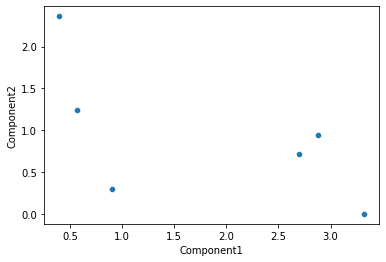

In [18]:
sns.scatterplot(data=nmf_proj,  x='Component1',y='Component2')

In [19]:
print('Dimensiones de los datos proyectados: ',nmf_proj.shape)
print('Dimensiones de la matriz W: ', nmf.components_.shape)

Dimensiones de los datos proyectados:  (6, 2)
Dimensiones de la matriz W:  (2, 4)


In [20]:
  # X ≈ W x H
np.matmul(nmf_proj.to_numpy(),nmf.components_)

array([[10.73389026,  5.63899629, 11.47925037,  5.02705688],
       [ 9.38241924,  5.21441729,  9.96524173,  6.88758468],
       [ 8.78739277,  4.83225939,  9.3456391 ,  6.0011728 ],
       [ 2.95260375,  1.64158407,  3.13586338,  2.17300513],
       [ 1.93269653,  1.39018282,  1.9766848 ,  4.18001253],
       [ 1.44902571,  1.47659333,  1.3774762 ,  6.92829632]])

In [ ]:
df_test

# Ejemplo con los datos de pasajeros en Chicago

In [21]:
!mkdir data

In [22]:
import gdown

urls = ['https://drive.google.com/uc?export=download&id=1QvHTL7yok7oHX0TmuSm8OMpvxnItjT_s', # training  https://drive.google.com/file/d/1QvHTL7yok7oHX0TmuSm8OMpvxnItjT_s/view?usp=sharing  
        'https://drive.google.com/uc?export=download&id=1nWcvoCkgUeCr-AT45JSsqKcSBUr1YbpU', # testing https://drive.google.com/file/d/1nWcvoCkgUeCr-AT45JSsqKcSBUr1YbpU/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-', # train_days   https://drive.google.com/file/d/1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-/view?usp=sharing 
        'https://drive.google.com/uc?export=download&id=16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq', # okc_train  https://drive.google.com/file/d/16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq/view?usp=sharing
        ]
outputs = ['training_proj.csv','testing_proj.csv', 'train_days.csv','okc_train.csv']

for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1QvHTL7yok7oHX0TmuSm8OMpvxnItjT_s
To: /content/data/training_proj.csv
35.2MB [00:00, 142MB/s] 
Downloading...
From: https://drive.google.com/uc?export=download&id=1nWcvoCkgUeCr-AT45JSsqKcSBUr1YbpU
To: /content/data/testing_proj.csv
100%|██████████| 101k/101k [00:00<00:00, 21.7MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-
To: /content/data/train_days.csv
100%|██████████| 107k/107k [00:00<00:00, 19.3MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq
To: /content/data/okc_train.csv
12.3MB [00:00, 165MB/s]


In [23]:
training = pd.read_csv('data/training_proj.csv', parse_dates=True, index_col=0)
testing = pd.read_csv('data/testing_proj.csv', parse_dates=True, index_col=1)
train_days = pd.read_csv('data/train_days.csv',index_col=1, parse_dates=True)

In [24]:
training.head()

,s_40380,dow,doy,week,month,year,Advent1st,Advent2nd,Advent3rd,Advent4th,AllSaints,AllSouls,Annunciation,Ascension,AshWednesday,AssumptionOfMary,BirthOfVirginMary,BoxingDay,CaRemembranceDay,CelebrationOfHolyCross,ChristmasEve,ChristTheKing,CorpusChristi,Easter,EasterMonday,EasterSunday,Epiphany,MassOfArchangels,PalmSunday,Pentecost,PentecostMonday,PresentationOfLord,Quinquagesima,RogationSunday,Septuagesima,SolemnityOfMary,TransfigurationOfLord,TrinitySunday,USChristmasDay,USColumbusDay,...,l21_41400,l21_41410,l21_41420,l21_41440,l21_41450,l21_41460,l21_41480,l21_41490,l21_41500,l21_41660,temp_min,temp,temp_max,temp_change,dew,humidity,pressure,pressure_change,wind,wind_max,gust,gust_max,percip,percip_max,weather_rain,weather_snow,weather_cloud,weather_storm,Blackhawks_Away,Blackhawks_Home,Bulls_Away,Bulls_Home,Bears_Away,Bears_Home,WhiteSox_Away,WhiteSox_Home,Cubs_Away,Cubs_Home,l14_gas_price,l30_unemployment_rate
1,15.732,Mon,22,4,Jan,2001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.363,0.252,1.227,0.225,4.395,0.327,0.715,0.502,0.338,2.942,15.1,19.45,30.0,14.9,13.45,78.0,30.43,0.12,5.2,10.4,0.0,0.0,0.0,0.0,0.0,0.000000,0.708333,0.000000,0,0,0,0,0,0,0,0,0,0,1.516,NaN
2,15.762,Tue,23,4,Jan,2001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4.775,1.706,3.937,1.512,11.058,2.040,3.194,2.390,1.710,12.087,25.0,30.45,36.0,11.0,25.00,79.0,30.19,0.18,8.1,11.5,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.208333,0,0,0,1,0,0,0,0,0,0,1.516,NaN
3,15.872,Wed,24,4,Jan,2001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5.243,1.918,4.329,1.699,11.680,2.124,3.272,2.495,1.888,12.622,19.0,25.00,28.9,9.9,18.00,81.0,30.16,0.23,10.4,19.6,0.0,0.0,0.0,0.0,0.0,0.214286,0.357143,0.071429,0,0,1,0,0,0,0,0,0,0,1.516,NaN
4,15.874,Thu,25,4,Jan,2001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5.270,1.962,4.607,1.717,11.883,2.246,3.398,2.531,1.905,12.936,15.1,22.45,27.0,11.9,10.90,66.5,30.44,0.16,9.8,16.1,0.0,0.0,0.0,0.0,0.0,0.000000,0.291667,0.041667,0,0,0,0,0,0,0,0,0,0,1.516,NaN
5,15.423,Fri,26,4,Jan,2001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5.184,1.997,4.666,1.736,12.771,2.362,3.346,2.202,2.049,13.043,21.0,27.00,32.0,11.0,21.90,84.0,29.91,0.65,12.7,19.6,0.0,25.3,0.0,0.0,0.0,0.516129,0.451613,0.451613,0,0,0,0,0,0,0,0,0,0,1.516,NaN


In [25]:
testing.head()

,Unnamed: 0,s_40380,dow,doy,week,month,year,Advent1st,Advent2nd,Advent3rd,Advent4th,AllSaints,AllSouls,Annunciation,Ascension,AshWednesday,AssumptionOfMary,BirthOfVirginMary,BoxingDay,CaRemembranceDay,CelebrationOfHolyCross,ChristmasEve,ChristTheKing,CorpusChristi,Easter,EasterMonday,EasterSunday,Epiphany,MassOfArchangels,PalmSunday,Pentecost,PentecostMonday,PresentationOfLord,Quinquagesima,RogationSunday,Septuagesima,SolemnityOfMary,TransfigurationOfLord,TrinitySunday,USChristmasDay,...,l21_41400,l21_41410,l21_41420,l21_41440,l21_41450,l21_41460,l21_41480,l21_41490,l21_41500,l21_41660,temp_min,temp,temp_max,temp_change,dew,humidity,pressure,pressure_change,wind,wind_max,gust,gust_max,percip,percip_max,weather_rain,weather_snow,weather_cloud,weather_storm,Blackhawks_Away,Blackhawks_Home,Bulls_Away,Bulls_Home,Bears_Away,Bears_Home,WhiteSox_Away,WhiteSox_Home,Cubs_Away,Cubs_Home,l14_gas_price,l30_unemployment_rate
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-29,1,21.137,Mon,242,35,Aug,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10.561,3.895,6.473,2.211,15.331,2.926,3.886,3.010,2.670,20.918,73.0,78.55,89.1,16.1,69.1,76.0,30.175,0.08,6.90,11.5,0,0.0,0,0.00,0.038462,0,0.884615,0.115385,0,0,0,0,0,0,1,1,1,1,2.380,5.8
2016-08-30,2,21.464,Tue,243,35,Aug,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11.375,4.082,14.536,2.451,17.363,3.215,4.182,3.552,2.884,24.120,75.0,78.10,84.9,9.9,72.0,79.0,30.110,0.16,5.80,13.8,0,17.3,0,0.14,0.257143,0,0.742857,0.371429,0,0,0,0,0,0,1,1,1,1,2.380,5.8
2016-08-31,3,21.738,Wed,244,35,Aug,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11.539,4.269,14.662,2.410,16.867,3.126,4.318,3.680,2.885,23.446,71.1,73.90,77.0,5.9,64.0,74.0,30.030,0.06,11.50,20.7,0,26.5,0,0.00,0.000000,0,1.000000,0.333333,0,0,0,0,0,0,1,1,1,1,2.380,5.8
2016-09-01,4,21.482,Thu,245,35,Sep,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15.025,4.141,15.078,2.434,17.337,3.138,4.349,4.008,2.887,24.186,66.0,71.10,73.9,7.9,55.9,60.0,30.130,0.11,10.95,20.7,0,26.5,0,0.00,0.041667,0,0.791667,0.000000,0,0,0,0,1,0,1,1,1,1,2.380,5.8
2016-09-02,5,19.790,Fri,246,36,Sep,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11.263,3.864,16.293,2.050,16.288,2.915,3.906,3.513,2.683,22.813,64.0,70.00,73.9,9.9,55.0,63.0,30.210,0.09,11.50,15.0,0,19.6,0,0.00,0.000000,0,0.960000,0.000000,0,0,0,0,0,0,1,1,1,1,2.479,5.8


In [26]:
weekends = training[training['dow'].isin(['Sat','Sun'])].filter(regex=("(l14_[0-9]|s_40380)"), axis=1).copy()
print(weekends.to_numpy().shape)
weekends.head()

(1628, 126)


,s_40380,l14_40010,l14_40020,l14_40030,l14_40040,l14_40050,l14_40060,l14_40070,l14_40080,l14_40090,l14_40100,l14_40120,l14_40130,l14_40160,l14_40170,l14_40180,l14_40200,l14_40210,l14_40220,l14_40230,l14_40250,l14_40260,l14_40270,l14_40280,l14_40290,l14_40300,l14_40310,l14_40320,l14_40330,l14_40340,l14_40350,l14_40360,l14_40370,l14_40380,l14_40390,l14_40400,l14_40420,l14_40430,l14_40440,l14_40460,...,l14_41030,l14_41050,l14_41060,l14_41070,l14_41080,l14_41090,l14_41120,l14_41130,l14_41140,l14_41150,l14_41160,l14_41180,l14_41190,l14_41200,l14_41210,l14_41220,l14_41240,l14_41250,l14_41260,l14_41270,l14_41280,l14_41290,l14_41300,l14_41310,l14_41320,l14_41330,l14_41340,l14_41350,l14_41360,l14_41380,l14_41400,l14_41410,l14_41420,l14_41440,l14_41450,l14_41460,l14_41480,l14_41490,l14_41500,l14_41660
6,2.425,0.693,1.610,0.889,0.911,2.704,2.274,1.954,2.733,0.994,3.023,0.624,0.713,0.284,0.526,0.426,1.873,0.000,0.717,1.612,0.866,3.806,0.626,1.353,0.979,0.330,1.111,2.004,5.659,2.032,0.920,1.049,2.294,2.413,1.242,0.458,0.007,0.814,0.002,0.858,...,0.006,0.421,0.566,0.638,0.743,2.590,0.831,0.684,0.408,1.130,0.410,0.907,1.056,1.943,0.734,5.668,0.800,0.461,0.964,0.441,2.765,2.116,2.983,0.951,7.031,0.772,0.358,0.508,0.370,2.740,3.370,0.661,3.079,0.662,9.386,0.953,1.646,1.367,0.912,5.605
7,1.467,0.408,0.882,0.601,0.414,1.468,1.631,0.978,1.843,0.565,2.195,0.378,0.507,0.120,0.346,0.225,0.887,0.000,0.361,1.063,0.540,2.518,0.397,0.835,0.682,0.231,0.567,1.342,3.995,1.629,0.578,0.539,1.154,1.374,0.750,0.238,0.000,0.583,0.000,0.268,...,0.000,0.218,0.347,0.450,0.471,1.338,0.604,0.393,0.242,0.635,0.290,0.597,0.759,1.402,0.417,3.611,0.487,0.255,0.504,0.294,1.856,1.127,2.130,0.534,4.790,0.475,0.205,0.301,0.274,2.024,2.292,0.389,2.170,0.270,6.490,0.486,0.909,0.887,0.567,3.662
13,2.477,0.663,1.640,0.880,0.914,2.422,2.280,1.852,2.675,1.046,3.104,0.643,0.742,0.312,0.515,0.402,1.926,0.000,0.675,1.459,0.833,3.674,0.651,1.337,0.897,0.332,1.037,1.951,5.395,2.099,0.943,0.861,2.173,2.320,1.178,0.340,0.004,0.780,0.001,0.858,...,0.010,0.367,0.563,0.644,0.802,2.264,1.021,0.673,0.415,1.158,0.410,0.926,1.026,1.777,0.766,5.298,0.782,0.391,0.925,0.432,2.692,2.159,3.434,0.948,6.783,0.739,0.378,0.502,0.361,2.762,3.105,0.635,2.863,0.642,9.332,0.932,1.582,1.204,0.949,5.734
14,1.556,0.411,0.873,0.580,0.454,1.471,1.639,1.015,1.821,0.533,2.171,0.337,0.517,0.126,0.387,0.212,0.971,0.000,0.398,0.972,0.600,2.457,0.374,0.779,0.735,0.240,0.562,1.320,3.747,1.520,0.534,0.522,1.229,1.491,0.749,0.195,0.000,0.579,0.000,0.267,...,0.000,0.233,0.323,0.397,0.474,1.370,0.728,0.363,0.251,0.675,0.234,0.603,0.703,1.325,0.413,3.476,0.506,0.258,0.535,0.274,1.945,1.198,2.213,0.523,4.366,0.490,0.197,0.312,0.263,1.987,2.183,0.371,2.025,0.312,6.016,0.488,0.920,0.661,0.491,3.759
20,2.432,0.677,1.729,0.929,0.914,2.573,2.317,1.820,2.550,1.058,3.110,0.646,0.746,0.294,0.555,0.404,1.968,0.002,0.611,1.474,0.800,4.092,0.691,1.284,0.971,0.329,1.063,1.921,5.424,2.093,0.954,1.090,2.252,2.425,1.263,0.483,0.004,0.764,0.000,1.598,...,0.005,0.459,0.542,0.615,0.858,2.493,1.033,0.671,0.358,1.170,0.408,0.895,1.062,1.973,0.780,5.458,0.732,0.479,0.967,0.436,2.721,2.139,3.474,0.908,6.895,0.709,0.296,0.446,0.407,2.722,3.138,0.719,2.922,0.634,9.301,0.883,1.642,1.048,0.905,6.104


In [27]:
weekend_days = train_days[train_days.index.dayofweek>4].copy()
print(weekend_days.index[0])
print(weekend_days.index[-1])
print(len(weekend_days))

2001-01-27 00:00:00
2016-08-28 00:00:00
1628


Utilizaremos a manera de ejemplo una librería para validación de series de tiempo [tscv](https://github.com/WenjieZ/TSCV) [Artículo informativo](https://www.zhengwenjie.net/tscv/)

In [28]:
!pip install tscv

In [29]:
from tscv import GapRollForward

In [30]:
ts_cv= GapRollForward( min_train_size=1600,min_test_size=4,max_test_size= 4,roll_size=1)

In [31]:
i=1
for train_index, test_index in ts_cv.split( weekend_days):
  print(f'Training Split {i}: {train_index.shape} -- Testing Split {i}: {test_index.shape}')
  i=i+1
  # print(train_index[0])
  # print(train_index[-1])
  # print(test_index[0])
  # print(test_index[-1])


Training Split 1: (1600,) -- Testing Split 1: (4,)
Training Split 2: (1601,) -- Testing Split 2: (4,)
Training Split 3: (1602,) -- Testing Split 3: (4,)
Training Split 4: (1603,) -- Testing Split 4: (4,)
Training Split 5: (1604,) -- Testing Split 5: (4,)
Training Split 6: (1605,) -- Testing Split 6: (4,)
Training Split 7: (1606,) -- Testing Split 7: (4,)
Training Split 8: (1607,) -- Testing Split 8: (4,)
Training Split 9: (1608,) -- Testing Split 9: (4,)
Training Split 10: (1609,) -- Testing Split 10: (4,)
Training Split 11: (1610,) -- Testing Split 11: (4,)
Training Split 12: (1611,) -- Testing Split 12: (4,)
Training Split 13: (1612,) -- Testing Split 13: (4,)
Training Split 14: (1613,) -- Testing Split 14: (4,)
Training Split 15: (1614,) -- Testing Split 15: (4,)
Training Split 16: (1615,) -- Testing Split 16: (4,)
Training Split 17: (1616,) -- Testing Split 17: (4,)
Training Split 18: (1617,) -- Testing Split 18: (4,)
Training Split 19: (1618,) -- Testing Split 19: (4,)
Training Sp

In [32]:
# Taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py 
from matplotlib.patches import Patch
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 25
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)


    # Formatting
    yticklabels = list(range(n_splits)) 
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
             xlim=[1585, 1630])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

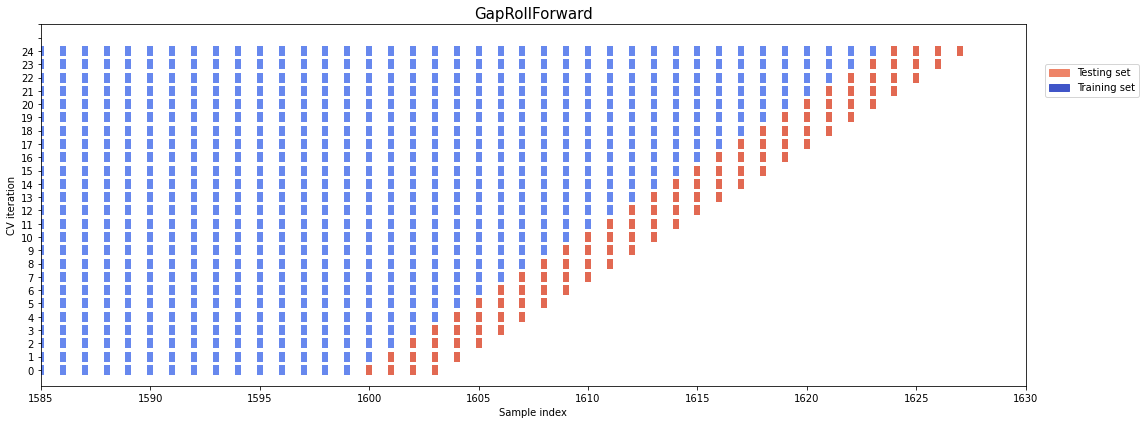

In [33]:
groups = np.hstack([[ii] * 25 for ii in range(25)])
fig, ax = plt.subplots(figsize=(16, 6))
plot_cv_indices(ts_cv, weekends, None,  ax, n_splits)

ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
          ['Testing set', 'Training set'], loc=(1.02, .8))
# Make the legend fit
plt.tight_layout()

In [34]:
X_train = weekends.drop(['s_40380'],axis=1) # Variables predictoras X
X_train.head()

,l14_40010,l14_40020,l14_40030,l14_40040,l14_40050,l14_40060,l14_40070,l14_40080,l14_40090,l14_40100,l14_40120,l14_40130,l14_40160,l14_40170,l14_40180,l14_40200,l14_40210,l14_40220,l14_40230,l14_40250,l14_40260,l14_40270,l14_40280,l14_40290,l14_40300,l14_40310,l14_40320,l14_40330,l14_40340,l14_40350,l14_40360,l14_40370,l14_40380,l14_40390,l14_40400,l14_40420,l14_40430,l14_40440,l14_40460,l14_40470,...,l14_41030,l14_41050,l14_41060,l14_41070,l14_41080,l14_41090,l14_41120,l14_41130,l14_41140,l14_41150,l14_41160,l14_41180,l14_41190,l14_41200,l14_41210,l14_41220,l14_41240,l14_41250,l14_41260,l14_41270,l14_41280,l14_41290,l14_41300,l14_41310,l14_41320,l14_41330,l14_41340,l14_41350,l14_41360,l14_41380,l14_41400,l14_41410,l14_41420,l14_41440,l14_41450,l14_41460,l14_41480,l14_41490,l14_41500,l14_41660
6,0.693,1.610,0.889,0.911,2.704,2.274,1.954,2.733,0.994,3.023,0.624,0.713,0.284,0.526,0.426,1.873,0.000,0.717,1.612,0.866,3.806,0.626,1.353,0.979,0.330,1.111,2.004,5.659,2.032,0.920,1.049,2.294,2.413,1.242,0.458,0.007,0.814,0.002,0.858,0.862,...,0.006,0.421,0.566,0.638,0.743,2.590,0.831,0.684,0.408,1.130,0.410,0.907,1.056,1.943,0.734,5.668,0.800,0.461,0.964,0.441,2.765,2.116,2.983,0.951,7.031,0.772,0.358,0.508,0.370,2.740,3.370,0.661,3.079,0.662,9.386,0.953,1.646,1.367,0.912,5.605
7,0.408,0.882,0.601,0.414,1.468,1.631,0.978,1.843,0.565,2.195,0.378,0.507,0.120,0.346,0.225,0.887,0.000,0.361,1.063,0.540,2.518,0.397,0.835,0.682,0.231,0.567,1.342,3.995,1.629,0.578,0.539,1.154,1.374,0.750,0.238,0.000,0.583,0.000,0.268,0.408,...,0.000,0.218,0.347,0.450,0.471,1.338,0.604,0.393,0.242,0.635,0.290,0.597,0.759,1.402,0.417,3.611,0.487,0.255,0.504,0.294,1.856,1.127,2.130,0.534,4.790,0.475,0.205,0.301,0.274,2.024,2.292,0.389,2.170,0.270,6.490,0.486,0.909,0.887,0.567,3.662
13,0.663,1.640,0.880,0.914,2.422,2.280,1.852,2.675,1.046,3.104,0.643,0.742,0.312,0.515,0.402,1.926,0.000,0.675,1.459,0.833,3.674,0.651,1.337,0.897,0.332,1.037,1.951,5.395,2.099,0.943,0.861,2.173,2.320,1.178,0.340,0.004,0.780,0.001,0.858,0.859,...,0.010,0.367,0.563,0.644,0.802,2.264,1.021,0.673,0.415,1.158,0.410,0.926,1.026,1.777,0.766,5.298,0.782,0.391,0.925,0.432,2.692,2.159,3.434,0.948,6.783,0.739,0.378,0.502,0.361,2.762,3.105,0.635,2.863,0.642,9.332,0.932,1.582,1.204,0.949,5.734
14,0.411,0.873,0.580,0.454,1.471,1.639,1.015,1.821,0.533,2.171,0.337,0.517,0.126,0.387,0.212,0.971,0.000,0.398,0.972,0.600,2.457,0.374,0.779,0.735,0.240,0.562,1.320,3.747,1.520,0.534,0.522,1.229,1.491,0.749,0.195,0.000,0.579,0.000,0.267,0.415,...,0.000,0.233,0.323,0.397,0.474,1.370,0.728,0.363,0.251,0.675,0.234,0.603,0.703,1.325,0.413,3.476,0.506,0.258,0.535,0.274,1.945,1.198,2.213,0.523,4.366,0.490,0.197,0.312,0.263,1.987,2.183,0.371,2.025,0.312,6.016,0.488,0.920,0.661,0.491,3.759
20,0.677,1.729,0.929,0.914,2.573,2.317,1.820,2.550,1.058,3.110,0.646,0.746,0.294,0.555,0.404,1.968,0.002,0.611,1.474,0.800,4.092,0.691,1.284,0.971,0.329,1.063,1.921,5.424,2.093,0.954,1.090,2.252,2.425,1.263,0.483,0.004,0.764,0.000,1.598,0.736,...,0.005,0.459,0.542,0.615,0.858,2.493,1.033,0.671,0.358,1.170,0.408,0.895,1.062,1.973,0.780,5.458,0.732,0.479,0.967,0.436,2.721,2.139,3.474,0.908,6.895,0.709,0.296,0.446,0.407,2.722,3.138,0.719,2.922,0.634,9.301,0.883,1.642,1.048,0.905,6.104


In [35]:
y_train = weekends['s_40380'] # Variable respuesta Y
y_train.head()

6     2.425
7     1.467
13    2.477
14    1.556
20    2.432
Name: s_40380, dtype: float64

### Baseline con regresión lineal

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline

In [37]:
lr = LinearRegression()

In [38]:
cross_val  = cross_val_score(lr, X_train, y_train, cv=ts_cv, scoring='neg_root_mean_squared_error')
print(cross_val*-1)
print(f'Mean: {cross_val.mean()*-1}, Std: {cross_val.std()}')

[0.72689689 0.78765332 0.70486282 0.76826587 0.77764362 0.57708818
 0.73809462 0.70769294 0.72473128 0.71359768 0.76220357 0.75457878
 0.69509936 0.58001822 0.57824242 0.5716051  0.59847844 0.66711076
 0.52862888 0.67875962 0.68095314 0.59486706 1.02346851 1.00033777
 0.95691412]
Mean: 0.7159117184517433, Std: 0.1258958813772952


### PCA

In [39]:
pca_stations = PCA(n_components=20,random_state=6011)

In [40]:
pca_stations.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=6011,
    svd_solver='auto', tol=0.0, whiten=False)

In [41]:
print(pca_stations.n_components_)
print(pca_stations.components_.shape) #eigenvectors

20
(20, 125)


In [42]:
variance_ration_cumsum = np.cumsum(np.pad(pca_stations.explained_variance_ratio_, (1, 0), "constant"))
variance_ration_cumsum

array([0.        , 0.59369887, 0.68608817, 0.75469993, 0.79281085,
       0.82173348, 0.84652008, 0.86502377, 0.88082534, 0.89509672,
       0.90798609, 0.91723096, 0.92486139, 0.9312862 , 0.93700982,
       0.94209304, 0.94673842, 0.95045597, 0.95412672, 0.95716812,
       0.96006433])

In [43]:
fig =px.line(x=range(21), y=variance_ration_cumsum, width=500, height=500)
fig.update_yaxes(range=[-0.02, 1.02])

In [45]:
projected_pca_stations = pca_stations.transform(X_train)
projected_pca_stations = pd.DataFrame(projected_pca_stations, columns=[f'Component{i+1}' for i in range(20)])
projected_pca_stations.head()

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8,Component9,Component10,Component11,Component12,Component13,Component14,Component15,Component16,Component17,Component18,Component19,Component20
0,-7.114355,-2.175063,-0.379346,2.540779,-0.009440,-0.674176,-0.654405,-0.005031,0.512845,1.147103,-0.011797,-0.185293,0.354725,0.193992,-0.485729,0.179416,0.686617,0.222124,-0.050386,-0.140073
1,-14.535785,-1.667696,-1.537011,0.242685,-0.569687,-0.257708,-0.734300,0.018334,0.190639,1.124521,-0.658442,0.093078,-0.138747,-0.110550,0.102941,-0.013802,0.024722,0.354342,0.142855,-0.024956
2,-7.707024,-2.300821,-0.304957,2.674230,-0.225906,-0.892391,-0.861200,-0.139298,0.587227,1.541963,0.037089,-0.227728,0.312402,0.313737,-0.506254,-0.075538,0.498127,0.223177,-0.050878,-0.271154
3,-14.915697,-1.532904,-1.260822,-0.110103,-0.341546,-0.315613,-0.884247,-0.053133,0.401786,1.388930,-0.635560,-0.069712,-0.060471,-0.141211,0.027960,0.092237,0.175393,0.367445,0.113294,-0.073569
4,-7.238659,-2.263573,-0.122216,2.744442,-0.331381,-1.092928,-1.152684,-0.237267,0.492314,1.664385,0.055132,-0.222827,0.436139,0.139718,-0.570349,0.116821,0.505888,0.314611,-0.110137,-0.328079


In [44]:
from plotly.subplots import make_subplots

In [46]:
#fig, axes = plt.subplots( nrows=5,n_cols=1)
fig = make_subplots( rows=1, cols=5, subplot_titles=[f'Component{i+1}' for i in range(5)],
                    column_widths=[50 for i in range(5)], row_heights=[50 ])
for i in range(1,6):
  scat = px.scatter( data_frame=projected_pca_stations, x=f'Component{i}', 
  y=y_train, color_discrete_sequence=['black'], opacity=0.3,
   trendline='ols' )
  fig.add_trace(scat.data[0], col=i, row=1)
  fig.add_trace(scat.data[1], col=i, row=1)
fig.update_layout(
    height=300, width=1500,
    margin=dict(l=5, r=5, t=30, b=5),
)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## NMF

In [47]:
nfm_stations = NMF(n_components=20, random_state=6011)

In [48]:
nfm_stations.fit(X_train)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=20, random_state=6011, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [49]:
nfm_stations.reconstruction_err_

103.03383433959266

In [50]:
projected_nfm_stations = nfm_stations.transform(X_train)
projected_nfm_stations = pd.DataFrame(projected_nfm_stations, columns=[f'Component{i+1}' for i in range(20)])
projected_nfm_stations.head()

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8,Component9,Component10,Component11,Component12,Component13,Component14,Component15,Component16,Component17,Component18,Component19,Component20
0,0.414437,0.226234,0.021022,0.559245,0.076908,0.082980,0.0,0.037441,0.217013,0.0,0.209673,0.108570,0.061842,0.014009,0.103822,0.125176,0.014647,0.050334,0.272791,0.010427
1,0.319561,0.130437,0.007882,0.386830,0.144882,0.006063,0.0,0.022396,0.113455,0.0,0.099466,0.060738,0.053132,0.000000,0.041064,0.115059,0.000000,0.049957,0.134189,0.000000
2,0.419666,0.212566,0.009217,0.528765,0.062222,0.070921,0.0,0.040550,0.212680,0.0,0.209066,0.099689,0.059172,0.000000,0.121284,0.085052,0.011224,0.045283,0.323854,0.000000
3,0.303320,0.143593,0.000000,0.378137,0.159472,0.010068,0.0,0.029115,0.058741,0.0,0.119896,0.055047,0.048198,0.000000,0.018489,0.096983,0.000000,0.049053,0.147689,0.000000
4,0.434349,0.247347,0.001743,0.523487,0.056799,0.067289,0.0,0.037742,0.188823,0.0,0.234868,0.093176,0.050770,0.000000,0.113628,0.076411,0.000000,0.051978,0.328894,0.010699


In [51]:
#fig, axes = plt.subplots( nrows=5,n_cols=1)
fig = make_subplots( rows=1, cols=5, subplot_titles=[f'Component{i+1}' for i in range(5)],
                    column_widths=[50 for i in range(5)], row_heights=[50 ])
for i in range(1,6):
  scat = px.scatter( data_frame=projected_nfm_stations, x=f'Component{i}', 
  y=y_train, color_discrete_sequence=['black'], opacity=0.3,
   trendline='ols' )
  fig.add_trace(scat.data[0], col=i, row=1)
  fig.add_trace(scat.data[1], col=i, row=1)
fig.update_layout(
    height=300, width=1200,
    margin=dict(l=5, r=5, t=30, b=5),
)
fig.show()

## PLS

In [52]:
from sklearn.cross_decomposition import PLSCanonical,PLSRegression

In [53]:
pls_stations = PLSRegression(n_components=20 )

In [54]:
pls_stations.fit(X_train,y_train)

PLSRegression(copy=True, max_iter=500, n_components=20, scale=True, tol=1e-06)

In [55]:
pls_stations.x_scores_

array([[ -5.42829314,  -3.47485017,   0.93180568, ...,   0.26810054,
         -0.35235104,   0.2115213 ],
       [-14.74475332,  -0.57234907,   0.09584117, ...,   0.11726673,
          0.02356785,   0.15304021],
       [ -5.91599374,  -3.46007921,   0.59814569, ...,   0.34405053,
         -0.0482571 ,  -0.17195156],
       ...,
       [  1.76735   ,   2.27630173,  -3.02350588, ...,   0.53564623,
         -1.87168215,  -0.33210514],
       [ 13.28980153,   0.38652417,   1.26881605, ...,   1.02235732,
         -0.37561319,  -0.98525261],
       [  2.93204673,   2.30531358,   0.16963036, ...,   0.74204111,
         -0.22709074,  -0.55664201]])

In [56]:
projected_pls_stations = pls_stations.transform(X_train)
projected_pls_stations = pd.DataFrame(projected_pls_stations, columns=[f'Component{i+1}' for i in range(20)])
projected_pls_stations.head()

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8,Component9,Component10,Component11,Component12,Component13,Component14,Component15,Component16,Component17,Component18,Component19,Component20
0,-5.428293,-3.474850,0.931806,0.362671,0.177558,-0.607742,-0.332978,-0.301139,-0.303816,0.115491,-0.854108,-0.775042,0.541786,-0.066015,-0.154909,0.246372,-0.343852,0.268101,-0.352351,0.211521
1,-14.744753,-0.572349,0.095841,0.079684,-0.286803,-0.247996,-0.797467,0.025821,0.012011,-0.188440,-0.045285,-0.862180,0.240505,0.182591,-0.061784,0.464783,-0.099272,0.117267,0.023568,0.153040
2,-5.915994,-3.460079,0.598146,-0.263211,-0.168256,-0.703298,-0.167270,-0.026160,-0.052001,-0.293569,-1.065358,-0.763112,0.447385,0.202654,0.078866,-0.022587,-0.141884,0.344051,-0.048257,-0.171952
3,-14.815321,-0.484209,0.125056,-0.149259,-0.275371,-0.204258,-0.879153,0.113155,0.180995,-0.232551,-0.135027,-0.680906,0.248804,0.126877,-0.034883,0.349740,-0.084742,0.143151,0.147108,-0.148954
4,-5.568912,-3.600181,0.885995,-0.007491,0.031192,-0.664257,-0.030388,-0.041751,0.099561,-0.372271,-1.392117,-0.351921,-0.331888,-0.364602,-0.404457,0.540493,-0.514801,0.609340,0.186372,-0.278374


In [57]:
#fig, axes = plt.subplots( nrows=5,n_cols=1)
fig = make_subplots( rows=1, cols=5, subplot_titles=[f'Component{i+1}' for i in range(5)],
                    column_widths=[50 for i in range(5)], row_heights=[50 ])
for i in range(1,6):

  #PLS
  scat3 = px.scatter( data_frame=projected_pls_stations, x=f'Component{i}', 
  y=y_train, color_discrete_sequence=['black'], opacity=0.3,
   trendline='ols' )
  fig.add_trace(scat3.data[0], col=i, row=1)
  fig.add_trace(scat3.data[1], col=i, row=1)
fig.update_layout(
    height=300, width=1200,
    margin=dict(l=5, r=5, t=30, b=5),
)
fig.show()

### Gráfica de resumen

In [58]:
#fig, axes = plt.subplots( nrows=5,n_cols=1)
fig = make_subplots( rows=5, cols=3, row_titles=[f'Component{i+1}' for i in range(5)],
                     horizontal_spacing=0.01, vertical_spacing=0.01,  shared_xaxes=True,
                     column_titles=['PCA', 'NFM', 'PLS'])
for i in range(1,6):
  #PCA
  scat = px.scatter( data_frame=projected_pca_stations, x=f'Component{i}', 
  y=y_train, color_discrete_sequence=['black'], opacity=0.3,
   trendline='ols' )
  fig.add_trace(scat.data[0], col=1, row=i)
  fig.add_trace(scat.data[1], col=1, row=i)

  #NMF
  scat2 = px.scatter( data_frame=projected_nfm_stations, x=f'Component{i}', 
  y=y_train, color_discrete_sequence=['black'], opacity=0.3,
   trendline='ols' )
  fig.add_trace(scat2.data[0], col=2, row=i)
  fig.add_trace(scat2.data[1], col=2, row=i)

  #PLS
  scat = px.scatter( data_frame=projected_pls_stations, x=f'Component{i}', 
  y=y_train, color_discrete_sequence=['black'], opacity=0.3,
   trendline='ols' )
  fig.add_trace(scat.data[0], col=3, row=i)
  fig.add_trace(scat.data[1], col=3, row=i)
fig.update_layout(
    height=900, width=700,
    margin=dict(l=5, r=20, t=40, b=5),
)
fig.show()

## Comparando el rendimiento

In [59]:
pca_lr_pipe = Pipeline([('pca', PCA(n_components=20,random_state=6011)),
                   ('lr', LinearRegression())])

cross_val_pca  = cross_val_score(pca_lr_pipe, X_train, y_train, cv=ts_cv, scoring='neg_root_mean_squared_error')
print(cross_val_pca*-1)
print('=================================================')
print('Resultado de la regresión lineal utilizando PCA')
print(f'Media: {cross_val_pca.mean()*-1}, Std: {cross_val_pca.std()}')

[0.83849758 0.71034747 0.4890947  0.42998145 0.49068786 0.71365233
 0.74865862 0.75124625 0.72978306 0.93414669 1.10674266 1.22987758
 1.30514311 1.0258299  0.7525475  0.54495945 0.42147086 0.47722854
 0.46250773 0.78159871 0.75941502 0.69764176 1.08047846 0.87908774
 0.86029911]
Resultado de la regresión lineal utilizando PCA
Media: 0.7688369651414029, Std: 0.24204349172561535


In [60]:
nmf_lr_pipe = Pipeline([('nmf', NMF(n_components=20,random_state=6011)),
                   ('lr', LinearRegression())])

cross_val_nmf  = cross_val_score(nmf_lr_pipe, X_train, y_train, cv=ts_cv, scoring='neg_root_mean_squared_error')
print(cross_val_nmf*-1)
print('=================================================')
print('Resultado de la regresión lineal utilizando NMF')
print(f'Media: {cross_val_nmf.mean()*-1}, Std: {cross_val_nmf.std()}')

[0.84881677 0.67708485 0.45972208 0.42910557 0.4707682  0.83269186
 0.99613461 0.8539078  0.79013908 0.96570578 1.38555415 1.07718202
 1.06724025 0.92986993 0.62495074 0.45549757 0.44532899 0.61744648
 0.64082731 0.8855497  0.84449765 0.67204139 1.01269132 0.84154411
 0.82394197]
Resultado de la regresión lineal utilizando NMF
Media: 0.7859296069903375, Std: 0.23317459592066653


In [61]:
from sklearn.cross_decomposition import PLSRegression

In [62]:
pls_lr_pipe = Pipeline([('pls', PLSRegression(n_components=20)),])

cross_val_pls  = cross_val_score(pls_lr_pipe, X_train, y_train, cv=ts_cv, scoring='neg_root_mean_squared_error')
print(cross_val_pls*-1)
print('=================================================')
print('Resultado de la regresión lineal utilizando PLS')
print(f'Media: {cross_val_pls.mean()*-1}, Std: {cross_val_pls.std()}')

[0.74184456 0.80955478 0.77146106 0.81162321 0.81599962 0.54529138
 0.59181599 0.58330603 0.59531622 0.64190008 0.69190734 0.72744208
 0.66081694 0.51933322 0.52482447 0.4983252  0.53352019 0.63531801
 0.52402912 0.73142508 0.73270557 0.66542651 1.05498981 0.98452118
 0.9423979 ]
Resultado de la regresión lineal utilizando PLS
Media: 0.6934038224624366, Std: 0.1477127003697551


In [63]:
comp_df = pd.DataFrame()
comp_df['RMSE'] = np.concatenate([cross_val_pca,cross_val_nmf,cross_val_pls], axis=0)
comp_df['RMSE'] = comp_df['RMSE'] * -1
comp_df['Algorithm'] = np.concatenate([['PCA']*25,['NMF']*25,['PLS']*25], axis=0)
comp_df.head()

,RMSE,Algorithm
0,0.838498,PCA
1,0.710347,PCA
2,0.489095,PCA
3,0.429981,PCA
4,0.490688,PCA


In [64]:
px.box(data_frame=comp_df, x='RMSE', y ='Algorithm', orientation='h', width=600, height=400, notched=True )

# Feature Interactions

## Polinomyal interactions or combinations

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
X_poly = pd.DataFrame(np.arange(6).reshape(3,2),columns=['x1','x2'])
X_poly

,x1,x2
0,0,1
1,2,3
2,4,5


In [67]:
poly = PolynomialFeatures(3) # interaction_only=False, include_bias=True,

In [68]:
poly_generated = poly.fit_transform(X_poly)
poly_generated = pd.DataFrame(poly_generated, columns=poly.get_feature_names())
poly_generated

,1,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,2.0,3.0,4.0,6.0,9.0,8.0,12.0,18.0,27.0
2,1.0,4.0,5.0,16.0,20.0,25.0,64.0,80.0,100.0,125.0


## Feature crossing

Para esta funcionalidad utilizaremos el paquete [patsy](https://patsy.readthedocs.io/en/latest/overview.html) de python para describir modelos estadísticos y construir matrices de diseño (design matrices)

In [69]:
from patsy import dmatrices, dmatrix

In [70]:
df_okc = pd.read_csv('data/okc_train.csv',index_col=0)
df_okc.head()

,age,diet,drinks,drugs,education,height,income,last_online,offspring,pets,religion,sign,smokes,status,where_state,where_town,religion_modifer,sign_modifer,cpp,cpp_fluently,cpp_okay,cpp_poorly,lisp,lisp_fluently,lisp_okay,lisp_poorly,asian,black,hispanic_latin,indian,middle_eastern,native_american,other,pacific_islander,white,essay_length,Class,profile
1,22,strictly_anything,socially,never,working_on_college_university,75,missing,3,doesnt_have_kids_but_might_want_them,likes_dogs_and_likes_cats,agnosticism,gemini,sometimes,single,california,south_san_francisco,and_very_serious_about_it,sign_mod_missing,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3.420945,other,1
4,23,vegetarian,socially,drugs_missing,working_on_college_university,71,inc20000,3,doesnt_want_kids,likes_cats,religion_missing,pisces,no,single,california,berkeley,religion_mod_missing,sign_mod_missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.671173,other,3
6,29,mostly_anything,socially,drugs_missing,graduated_from_college_university,67,missing,2,doesnt_have_kids_but_might_want_them,likes_cats,atheism,taurus,no,single,california,san_francisco,religion_mod_missing,sign_mod_missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.391112,stem,5
8,31,mostly_anything,socially,never,graduated_from_college_university,65,missing,2,doesnt_have_kids_but_wants_them,likes_dogs_and_likes_cats,christianity,sagittarius,no,single,california,san_francisco,religion_mod_missing,sign_mod_missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.090611,other,6
10,37,mostly_anything,not_at_all,never,working_on_two_year_college,65,missing,3,kids_missing,likes_dogs_and_likes_cats,atheism,cancer,no,single,california,san_mateo,and_laughing_about_it,but_it_doesnt_matter,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.382377,other,7


$a * b$ es una abreviación de  $a + b + a:b$, y es útil para el caso común donde se desea incluir todas las interaccones entre las variables 


In [71]:
y_cross,X_cross = dmatrices('Class~C(drinks)*C(drugs)', data=df_okc,return_type='dataframe') # a * b is short-hand for a + b + a:b

In [72]:
X_cross.head()

,Intercept,C(drinks)[T.drinks_missing],C(drinks)[T.not_at_all],C(drinks)[T.often],C(drinks)[T.rarely],C(drinks)[T.socially],C(drinks)[T.very_often],C(drugs)[T.never],C(drugs)[T.often],C(drugs)[T.sometimes],C(drinks)[T.drinks_missing]:C(drugs)[T.never],C(drinks)[T.not_at_all]:C(drugs)[T.never],C(drinks)[T.often]:C(drugs)[T.never],C(drinks)[T.rarely]:C(drugs)[T.never],C(drinks)[T.socially]:C(drugs)[T.never],C(drinks)[T.very_often]:C(drugs)[T.never],C(drinks)[T.drinks_missing]:C(drugs)[T.often],C(drinks)[T.not_at_all]:C(drugs)[T.often],C(drinks)[T.often]:C(drugs)[T.often],C(drinks)[T.rarely]:C(drugs)[T.often],C(drinks)[T.socially]:C(drugs)[T.often],C(drinks)[T.very_often]:C(drugs)[T.often],C(drinks)[T.drinks_missing]:C(drugs)[T.sometimes],C(drinks)[T.not_at_all]:C(drugs)[T.sometimes],C(drinks)[T.often]:C(drugs)[T.sometimes],C(drinks)[T.rarely]:C(drugs)[T.sometimes],C(drinks)[T.socially]:C(drugs)[T.sometimes],C(drinks)[T.very_often]:C(drugs)[T.sometimes]
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
y_cross.head()

,Class[other],Class[stem]
1,1.0,0.0
4,1.0,0.0
6,0.0,1.0
8,1.0,0.0
10,1.0,0.0


In [75]:
X_cross = dmatrix('C(drinks)*C(drugs)', data=df_okc,return_type='dataframe')

In [76]:
X_cross.head()

,Intercept,C(drinks)[T.drinks_missing],C(drinks)[T.not_at_all],C(drinks)[T.often],C(drinks)[T.rarely],C(drinks)[T.socially],C(drinks)[T.very_often],C(drugs)[T.never],C(drugs)[T.often],C(drugs)[T.sometimes],C(drinks)[T.drinks_missing]:C(drugs)[T.never],C(drinks)[T.not_at_all]:C(drugs)[T.never],C(drinks)[T.often]:C(drugs)[T.never],C(drinks)[T.rarely]:C(drugs)[T.never],C(drinks)[T.socially]:C(drugs)[T.never],C(drinks)[T.very_often]:C(drugs)[T.never],C(drinks)[T.drinks_missing]:C(drugs)[T.often],C(drinks)[T.not_at_all]:C(drugs)[T.often],C(drinks)[T.often]:C(drugs)[T.often],C(drinks)[T.rarely]:C(drugs)[T.often],C(drinks)[T.socially]:C(drugs)[T.often],C(drinks)[T.very_often]:C(drugs)[T.often],C(drinks)[T.drinks_missing]:C(drugs)[T.sometimes],C(drinks)[T.not_at_all]:C(drugs)[T.sometimes],C(drinks)[T.often]:C(drugs)[T.sometimes],C(drinks)[T.rarely]:C(drugs)[T.sometimes],C(drinks)[T.socially]:C(drugs)[T.sometimes],C(drinks)[T.very_often]:C(drugs)[T.sometimes]
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Stacking

## K-means featurization

Este ejemplo es parte del capítulo 7 del libro [Feature Engineering for Machine Learning](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/). El link con el código original está en el [github del libro](https://github.com/alicezheng/feature-engineering-book/blob/master/07.03-05_K-means_featurization.ipynb).

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.sparse import hstack
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
class KMeansFeaturizer:
    """Transforms numeric data into k-means cluster memberships.
    
    This transformer runs k-means on the input data and converts each data point
    into the id of the closest cluster. If a target variable is present, it is 
    scaled and included as input to k-means in order to derive clusters that
    obey the classification boundary as well as group similar points together.

    Parameters
    ----------
    k: integer, optional, default 100
        The number of clusters to group data into.

    target_scale: float, [0, infty], optional, default 5.0
        The scaling factor for the target variable. Set this to zero to ignore
        the target. For classification problems, larger `target_scale` values 
        will produce clusters that better respect the class boundary.

    random_state : integer or numpy.RandomState, optional
        This is passed to k-means as the generator used to initialize the 
        kmeans centers. If an integer is given, it fixes the seed. Defaults to 
        the global numpy random number generator.

    Attributes
    ----------
    cluster_centers_ : array, [k, n_features]
        Coordinates of cluster centers. n_features does count the target column.
    """

    def __init__(self, k=100, target_scale=5.0, random_state=None):
        self.k = k
        self.target_scale = target_scale
        self.random_state = random_state
        self.cluster_encoder = OneHotEncoder().fit(np.array(range(k)).reshape(-1,1)) # crea una columna binaria por cada cluster
        
    def fit(self, X, y=None):
        """Runs k-means on the input data and find centroids.

        If no target is given (`y` is None) then run vanilla k-means on input
        `X`. 

        If target `y` is given, then include the target (weighted by 
        `target_scale`) as an extra dimension for k-means clustering. In this 
        case, run k-means twice, first with the target, then an extra iteration
        without.

        After fitting, the attribute `cluster_centers_` are set to the k-means
        centroids in the input space represented by `X`.

        Parameters
        ----------
        X : array-like or sparse matrix, shape=(n_data_points, n_features)

        y : vector of length n_data_points, optional, default None
            If provided, will be weighted with `target_scale` and included in 
            k-means clustering as hint.
        """
        if y is None:
            # No target variable, just do plain k-means
            km_model = KMeans(n_clusters=self.k, 
                              n_init=20, 
                              random_state=self.random_state)
            km_model.fit(X)

            self.km_model_ = km_model
            self.cluster_centers_ = km_model.cluster_centers_
            return self

        # There is target information. Apply appropriate scaling and include
        # into input data to k-means            
        data_with_target = np.hstack((X, y[:,np.newaxis]*self.target_scale))

        # Build a pre-training k-means model on data and target
        km_model_pretrain = KMeans(n_clusters=self.k, 
                                   n_init=20, 
                                   random_state=self.random_state)
        km_model_pretrain.fit(data_with_target)

        # Run k-means a second time to get the clusters in the original space
        # without target info. Initialize using centroids found in pre-training.
        # Go through a single iteration of cluster assignment and centroid 
        # recomputation.
        km_model = KMeans(n_clusters=self.k, 
                          init=km_model_pretrain.cluster_centers_[:,:2], 
                          n_init=1, 
                          max_iter=1)
        km_model.fit(X)
        
        self.km_model = km_model
        self.cluster_centers_ = km_model.cluster_centers_
        return self
        
    def transform(self, X, y=None):
        """Outputs the closest cluster id for each input data point.

        Parameters
        ----------
        X : array-like or sparse matrix, shape=(n_data_points, n_features)

        y : vector of length n_data_points, optional, default None
            Target vector is ignored even if provided.

        Returns
        -------
        cluster_ids : array, shape[n_data_points,1]
        """
        clusters = self.km_model.predict(X)
        return self.cluster_encoder.transform(clusters.reshape(-1,1))
    
    def fit_transform(self, X, y=None):
        """Runs fit followed by transform.
        """
        self.fit(X, y)
        return self.transform(X, y)

In [ ]:
seed = 6011
training_data, training_labels = make_moons(n_samples=2000, noise=0.2, random_state=seed)

In [ ]:
training_data

In [ ]:
training_labels

In [ ]:
 plt.scatter(training_data[:, 0], training_data[:, 1], c=training_labels, cmap='Set1', alpha=0.2)

In [ ]:
kmf_hint = KMeansFeaturizer(k=100, target_scale=10, random_state=seed).fit(training_data, training_labels)
kmf_no_hint = KMeansFeaturizer(k=100, target_scale=0, random_state=seed).fit(training_data, training_labels)

In [ ]:
def kmeans_voronoi_plot(X, y, cluster_centers, ax):
    """Plots the Voronoi diagram of the kmeans clusters overlayed with the data"""
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', alpha=0.2)
    vor = Voronoi(cluster_centers)
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, alpha=0.5)

In [ ]:
fig = plt.figure(figsize=(24,10))
ax = plt.subplot(211, aspect='equal')
kmeans_voronoi_plot(training_data, training_labels, kmf_hint.cluster_centers_, ax)
ax.set_title('K-Means with Target Hint')
ax2 = plt.subplot(212, aspect='equal')
kmeans_voronoi_plot(training_data, training_labels, kmf_no_hint.cluster_centers_, ax2)
ax2.set_title('K-Means without Target Hint')

## Classification with KMeans clustering features¶

In [ ]:
test_data, test_labels = make_moons(n_samples=2000, noise=0.3, random_state=seed+5)

In [ ]:
training_cluster_features = kmf_hint.transform(training_data)
test_cluster_features = kmf_hint.transform(test_data)

training_with_cluster = hstack((training_data, training_cluster_features)) #scipy.sparse.hstack
test_with_cluster = hstack((test_data, test_cluster_features))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
lr_cluster = LogisticRegression(random_state=seed).fit(training_with_cluster, training_labels)

classifier_names = ['LR',
                    'kNN',
                    'RBF SVM',
                    'Random Forest',
                    'Boosted Trees']
classifiers = [LogisticRegression(random_state=seed),
               KNeighborsClassifier(5),
               SVC(gamma=2, C=1, random_state=seed),
               RandomForestClassifier(max_depth=5, n_estimators=10, 
                                      max_features=1, random_state=seed),
               GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,
                                          max_depth=5, random_state=seed)]
for model in classifiers:
    model.fit(training_data, training_labels)

In [ ]:
def test_roc(model, data, labels):
    if hasattr(model, "decision_function"):
        predictions = model.decision_function(data)
    else:
        predictions = model.predict_proba(data)[:,1]
    fpr, tpr, _ = roc_curve(labels, predictions) # sklearn.metrics.roc_curve
    auc_score = roc_auc_score(labels, predictions)
    print(f'{model.__class__.__name__}: {auc_score}')
    return fpr, tpr

In [ ]:

plt.figure(figsize=(10,10))
fpr_cluster, tpr_cluster = test_roc(lr_cluster, test_with_cluster, test_labels)
plt.plot(fpr_cluster, tpr_cluster, 'r-', label='LR with k-means')

for i, model in enumerate(classifiers):
    fpr, tpr = test_roc(model, test_data, test_labels)
    plt.plot(fpr, tpr, label=classifier_names[i])
    
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)